<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-11 22:18:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  49.5MB/s    in 4.7s    

2025-08-11 22:18:59 (43.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


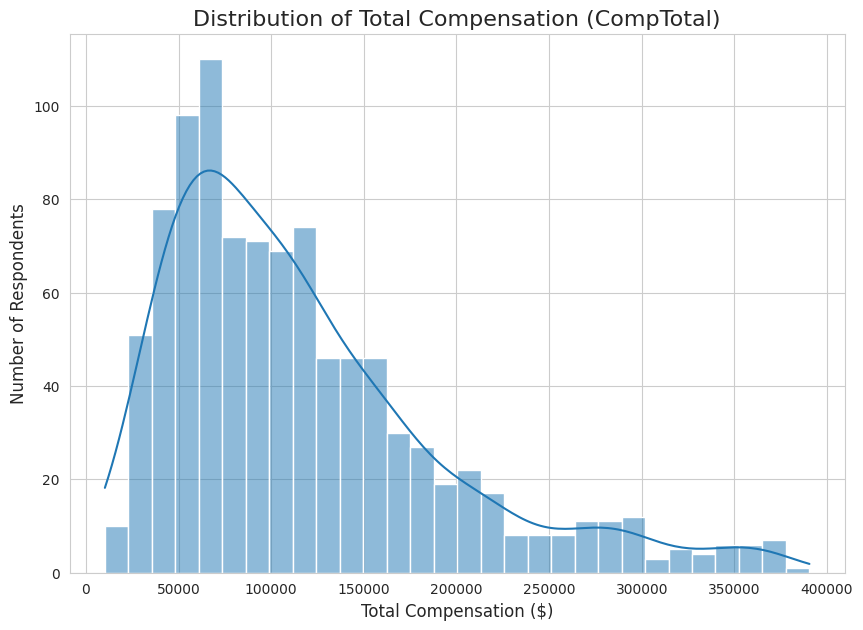

Descriptive Statistics for CompTotal:
count    1.000000e+03
mean     1.274207e+05
std      1.055173e+05
min      1.020990e+04
25%      6.273580e+04
50%      1.004797e+05
75%      1.553694e+05
max      1.464335e+06
Name: CompTotal, dtype: float64


In [10]:
## Write your code here
import numpy as np
import seaborn as sns
# --- 1. Generate Sample Data ---
# Create a sample dataset for CompTotal.
# We'll simulate a right-skewed distribution, which is common for salaries.
np.random.seed(42) # for reproducible results
data = {
    'CompTotal': np.random.lognormal(mean=11.5, sigma=0.7, size=1000)
}
df = pd.DataFrame(data)

# --- 2. Process the Data ---
# For better visualization, we can cap the maximum value to exclude extreme outliers.
# This helps make the main distribution clearer in the histogram.
df_filtered = df[df['CompTotal'] <= 400000]


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create a histogram
sns.histplot(data=df_filtered, x='CompTotal', bins=30, kde=True)


# --- 4. Add Titles and Labels ---
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('Total Compensation ($)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)


# --- 5. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('comptotal_histogram.png')
plt.show()


# --- 6. (Optional) Print Descriptive Statistics ---
print("Descriptive Statistics for CompTotal:")
print(df['CompTotal'].describe())


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


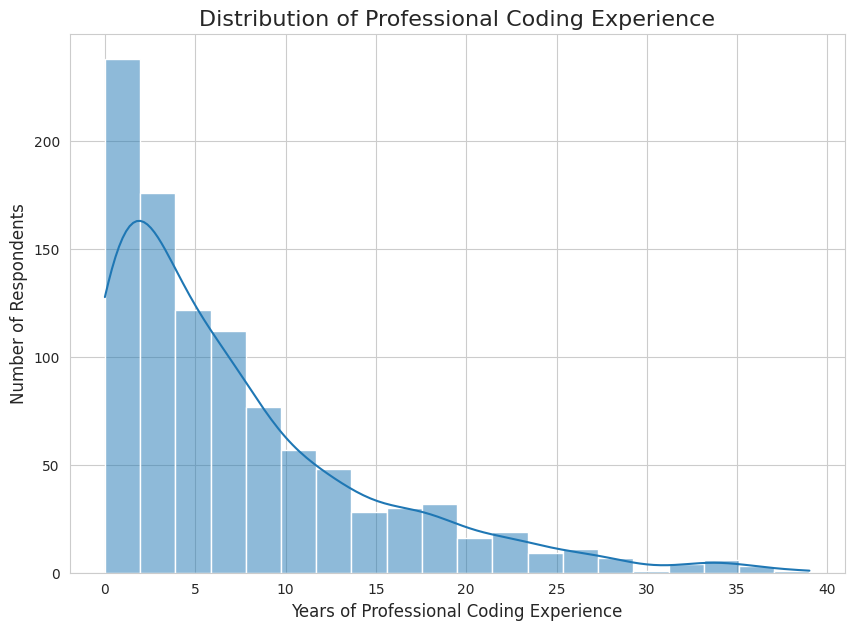

Descriptive Statistics for YearsCodePro:
count    1000.000000
mean        7.291000
std         7.772305
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        65.000000
Name: YearsCodePro, dtype: float64


In [11]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for YearsCodePro.
# We'll simulate a right-skewed distribution, as many have a few years of experience.
np.random.seed(42) # for reproducible results
data = {
    'YearsCodePro': np.random.exponential(scale=8, size=1000).astype(int)
}
df = pd.DataFrame(data)

# --- 2. Process the Data ---
# For better visualization, we can cap the maximum value to exclude extreme outliers.
df_filtered = df[df['YearsCodePro'] <= 40]


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create a histogram
sns.histplot(data=df_filtered, x='YearsCodePro', bins=20, kde=True)


# --- 4. Add Titles and Labels ---
plt.title('Distribution of Professional Coding Experience', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)


# --- 5. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('yearscodepro_histogram.png')
plt.show()


# --- 6. (Optional) Print Descriptive Statistics ---
print("Descriptive Statistics for YearsCodePro:")
print(df['YearsCodePro'].describe())


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


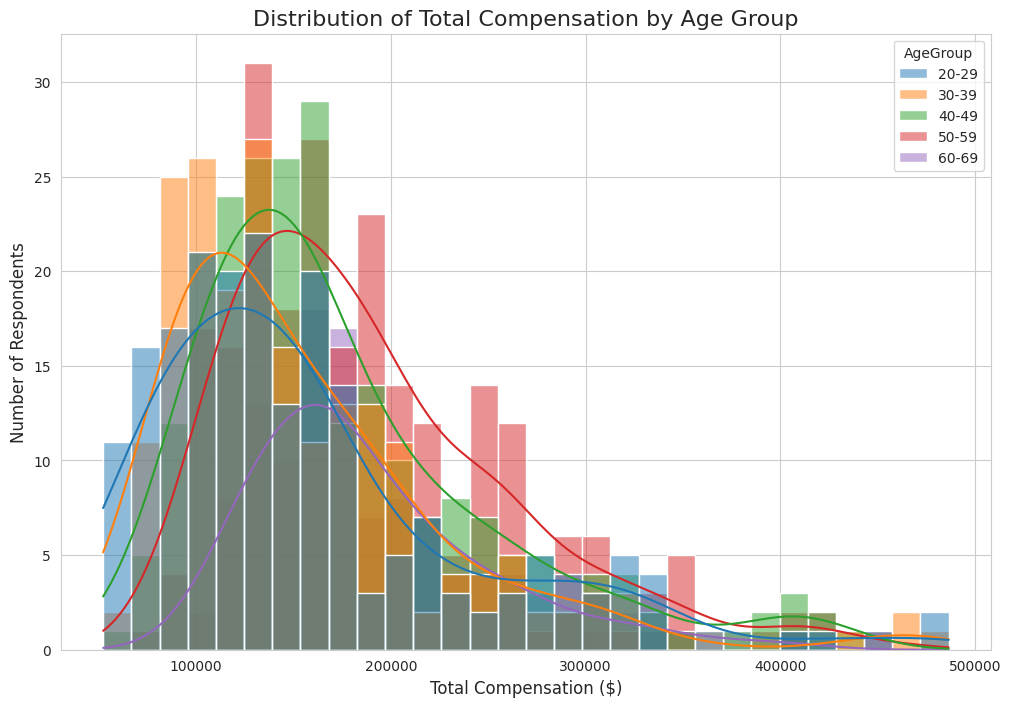

Descriptive Statistics for CompTotal by Age Group:
          count           mean           std            min            25%  \
AgeGroup                                                                     
20-29     204.0  159367.504513  85047.482392   52318.350877   99087.174366   
30-39     204.0  155026.540281  74063.632980   53617.406043  104194.340911   
40-49     234.0  174438.327048  76049.131476   64165.604450  124088.621185   
50-59     238.0  188609.064803  72289.333688   80855.534272  135138.014767   
60-69     114.0  188245.178028  59810.933471  103189.366556  144723.506779   

                    50%            75%            max  
AgeGroup                                               
20-29     137952.106159  181283.461933  486321.530725  
30-39     134069.490096  186341.323011  475105.604694  
40-49     155351.705959  207054.826571  433545.970801  
50-59     171587.499955  225176.147282  456962.748983  
60-69     172880.441032  215182.863055  404791.088534  


/tmp/ipykernel_668/3954918012.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_filtered.groupby('AgeGroup')['CompTotal'].describe())


In [12]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for Age and CompTotal.
np.random.seed(42) # for reproducible results
ages = np.random.randint(20, 65, size=1000)
base_comp = np.random.lognormal(mean=11.5, sigma=0.6, size=1000)
# Make compensation slightly correlated with age
comp_total = base_comp + (ages * 1200)
data = {
    'Age': ages,
    'CompTotal': comp_total
}
df = pd.DataFrame(data)

# --- 2. Process the Data ---
# Create age group bins for comparison
bins = [20, 29, 39, 49, 59, 69]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# For better visualization, cap the maximum compensation value
df_filtered = df[df['CompTotal'] <= 500000]


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create histograms for each age group using the 'hue' parameter
# 'kde=True' adds a density curve to show the shape of the distribution
# 'multiple="layer"' makes the histograms semi-transparent and overlaps them
sns.histplot(data=df_filtered, x='CompTotal', hue='AgeGroup', multiple="layer", kde=True, bins=30)


# --- 4. Add Titles and Labels ---
plt.title('Distribution of Total Compensation by Age Group', fontsize=16)
plt.xlabel('Total Compensation ($)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)


# --- 5. Display the Plot ---
# This will show the plot in a new window.
plt.show()


# --- 6. (Optional) Print Descriptive Statistics by Group ---
print("Descriptive Statistics for CompTotal by Age Group:")
print(df_filtered.groupby('AgeGroup')['CompTotal'].describe())


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


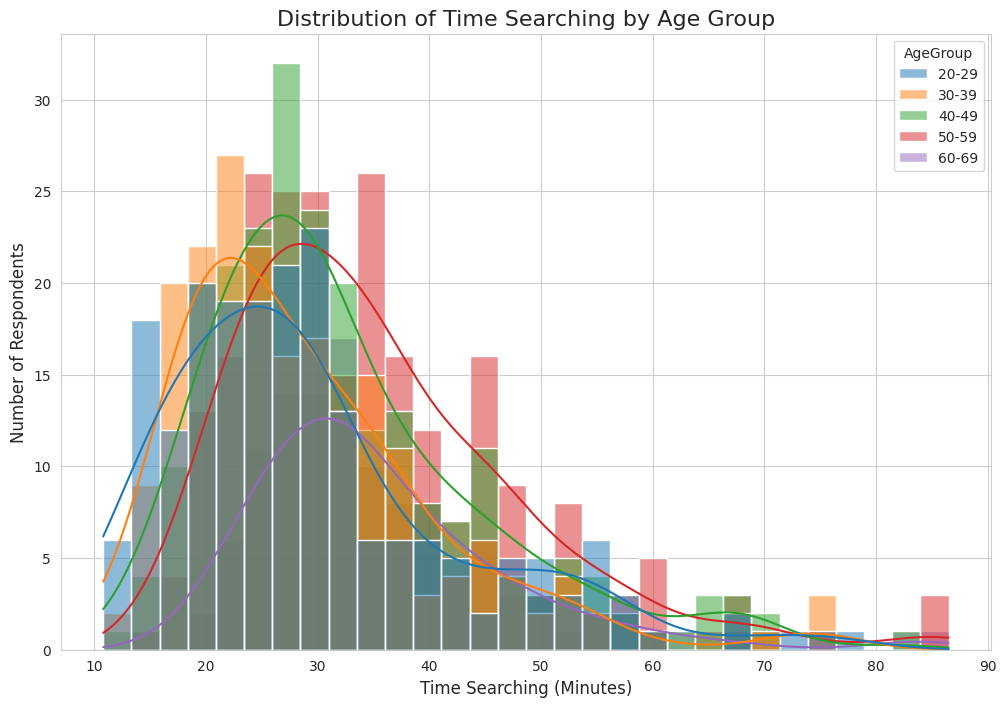

Descriptive Statistics for TimeSearching by Age Group:
          count       mean        std        min        25%        50%  \
AgeGroup                                                                 
20-29     204.0  29.506074  13.241820  11.043539  19.972139  26.639329   
30-39     204.0  28.934506  11.691633  10.777268  20.693417  25.973343   
40-49     235.0  32.342904  12.425330  12.520300  24.128660  29.690982   
50-59     241.0  35.161879  12.730980  15.498519  26.076692  32.397595   
60-69     116.0  35.478751  11.516879  19.489887  27.684778  32.675755   

                75%        max  
AgeGroup                        
20-29     33.656195  76.724614  
30-39     34.576173  75.955941  
40-49     38.047593  81.643494  
50-59     41.224775  86.502782  
60-69     39.699696  84.975427  


/tmp/ipykernel_668/2895612053.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_filtered.groupby('AgeGroup')['TimeSearching'].describe())


In [13]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for Age and TimeSearching.
np.random.seed(42) # for reproducible results
ages = np.random.randint(20, 65, size=1000)
base_time = np.random.lognormal(mean=3, sigma=0.5, size=1000)
# Make search time slightly correlated with age
time_searching = base_time + (ages * 0.2)
data = {
    'Age': ages,
    'TimeSearching': time_searching
}
df = pd.DataFrame(data)

# --- 2. Process the Data ---
# Create age group bins for comparison
bins = [20, 29, 39, 49, 59, 69]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# For better visualization, cap the maximum search time value
df_filtered = df[df['TimeSearching'] <= 90]


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create histograms for each age group using the 'hue' parameter
# 'kde=True' adds a density curve to show the shape of the distribution
# 'multiple="layer"' makes the histograms semi-transparent and overlaps them
sns.histplot(data=df_filtered, x='TimeSearching', hue='AgeGroup', multiple="layer", kde=True, bins=30)


# --- 4. Add Titles and Labels ---
plt.title('Distribution of Time Searching by Age Group', fontsize=16)
plt.xlabel('Time Searching (Minutes)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)


# --- 5. Display the Plot ---
# This will show the plot in a new window.
plt.show()


# --- 6. (Optional) Print Descriptive Statistics by Group ---
print("Descriptive Statistics for TimeSearching by Age Group:")
print(df_filtered.groupby('AgeGroup')['TimeSearching'].describe())


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


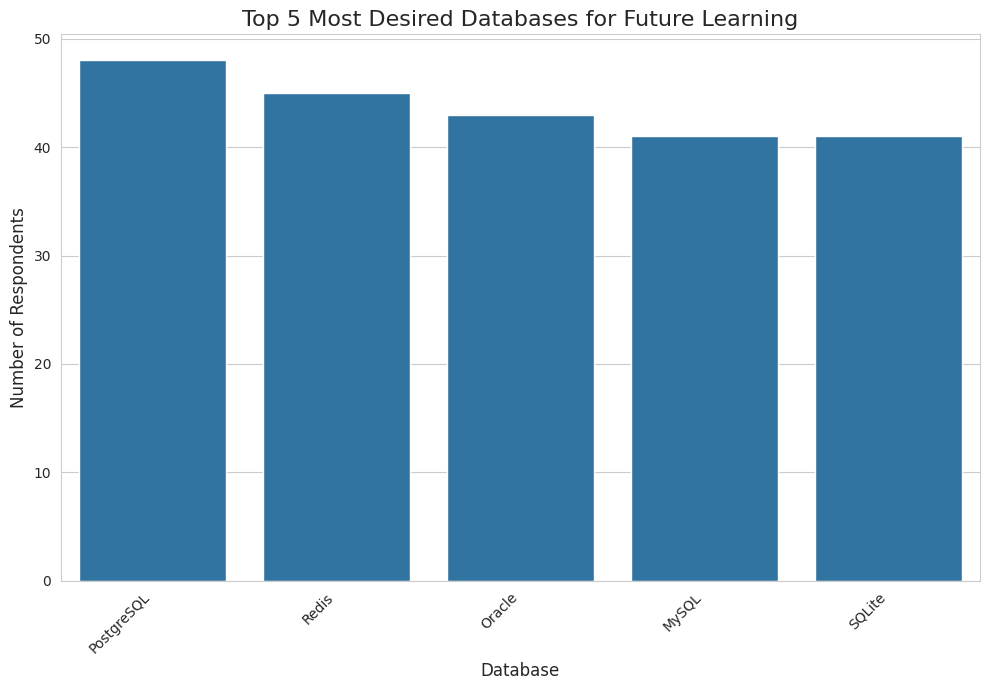

Top 5 most wanted databases:
DatabaseWantToWorkWith
PostgreSQL    48
Redis         45
Oracle        43
MySQL         41
SQLite        41
Name: count, dtype: int64


In [14]:
## Write your code here
# --- 1. Generate Sample Data ---
# This simulates a survey column where respondents can choose multiple databases.
# The data is semi-colon separated.
np.random.seed(42) # for reproducible results
databases = [
    'PostgreSQL', 'MongoDB', 'Redis', 'MySQL', 'SQLite',
    'Microsoft SQL Server', 'Oracle', 'MariaDB', 'Firebase', 'Elasticsearch'
]
# Create sample survey data
choices = [';'.join(np.random.choice(databases, size=np.random.randint(1, 4))) for _ in range(200)]
data = {'DatabaseWantToWorkWith': choices}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# Count the occurrences of each database.
db_counts = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts()

# Get the top 5 databases
top_5_dbs = db_counts.head(5)


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create a bar plot (the correct visualization for categorical counts)
sns.barplot(x=top_5_dbs.index, y=top_5_dbs.values)


# --- 4. Add Titles and Labels ---
plt.title('Top 5 Most Desired Databases for Future Learning', fontsize=16)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout


# --- 5. Display the Plot ---
# This will show the plot in a new window.
plt.show()


# --- 6. (Optional) Print the Top 5 Counts ---
print("Top 5 most wanted databases:")
print(top_5_dbs)


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


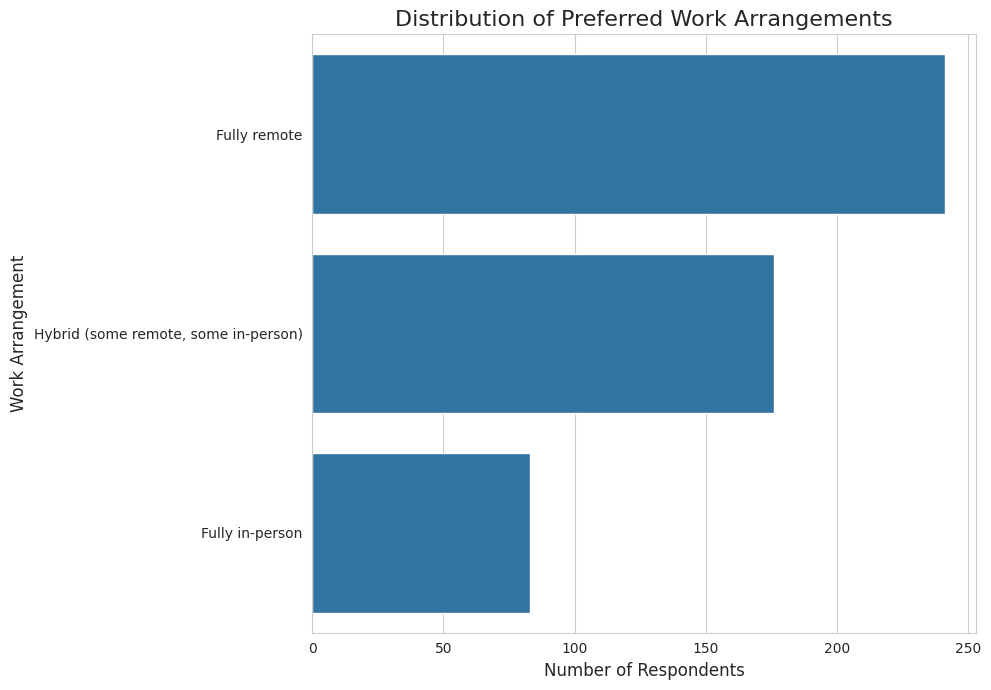

Counts for each work arrangement preference:
WorkArrangement
Fully remote                            241
Hybrid (some remote, some in-person)    176
Fully in-person                          83
Name: count, dtype: int64


In [15]:
## Write your code here
# --- 1. Generate Sample Data ---
# This simulates a survey column for preferred work arrangements.
np.random.seed(42) # for reproducible results
work_options = [
    'Fully remote',
    'Hybrid (some remote, some in-person)',
    'Fully in-person'
]
# Create sample survey data with different probabilities for each choice
choices = np.random.choice(work_options, size=500, p=[0.5, 0.35, 0.15])
data = {'WorkArrangement': choices}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# For this plot, seaborn's countplot can handle the counting directly.
# We'll get the order for a clean presentation.
order = df['WorkArrangement'].value_counts().index


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# A countplot is ideal for showing the distribution of a categorical variable.
sns.countplot(data=df, y='WorkArrangement', order=order, orient='h')


# --- 4. Add Titles and Labels ---
plt.title('Distribution of Preferred Work Arrangements', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Work Arrangement', fontsize=12)
plt.tight_layout() # Adjust layout


# --- 5. Display the Plot ---
# This will show the plot in a new window.
plt.show()


# --- 6. (Optional) Print the Counts ---
print("Counts for each work arrangement preference:")
print(df['WorkArrangement'].value_counts())


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


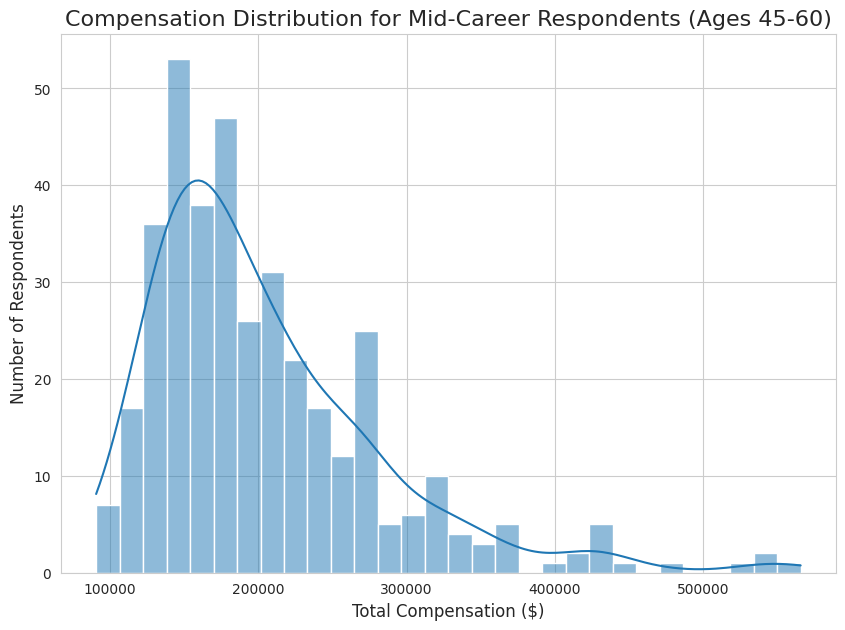

Descriptive Statistics for CompTotal (Ages 45-60):
count       378.000000
mean     203802.909825
std       79195.503130
min       90555.794475
25%      149849.576349
50%      181526.788229
75%      238912.110649
max      565987.240812
Name: CompTotal, dtype: float64


In [16]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for Age and CompTotal.
np.random.seed(42) # for reproducible results
ages = np.random.randint(20, 65, size=1000)
base_comp = np.random.lognormal(mean=11.5, sigma=0.6, size=1000)
# Make compensation slightly correlated with age
comp_total = base_comp + (ages * 1500)
data = {
    'Age': ages,
    'CompTotal': comp_total
}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# Filter for the specific age group
age_group_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create a histogram for the filtered data
sns.histplot(data=age_group_df, x='CompTotal', bins=30, kde=True)


# --- 4. Add Titles and Labels ---
plt.title('Compensation Distribution for Mid-Career Respondents (Ages 45-60)', fontsize=16)
plt.xlabel('Total Compensation ($)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)


# --- 5. Display the Plot ---
# This will show the plot in a new window.
plt.show()


# --- 6. (Optional) Print Descriptive Statistics ---
print("Descriptive Statistics for CompTotal (Ages 45-60):")
print(age_group_df['CompTotal'].describe())


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


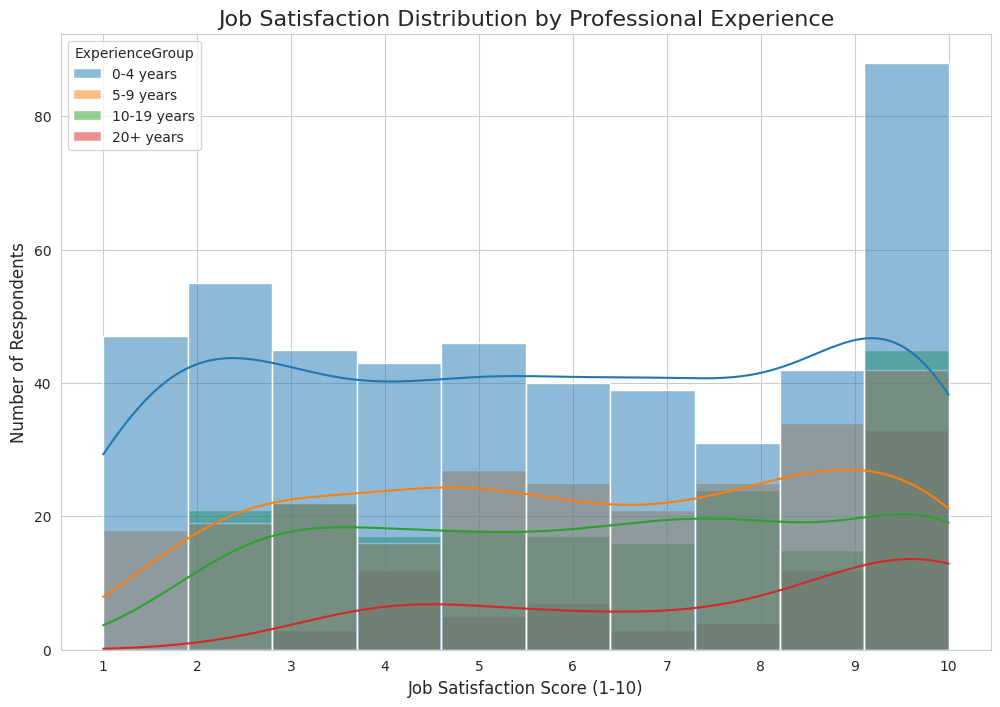

Descriptive Statistics for Job Satisfaction by Experience Group:
                 count      mean       std  min  25%  50%   75%   max
ExperienceGroup                                                      
0-4 years        476.0  5.686134  2.919743  1.0  3.1  6.0   8.3  10.0
5-9 years        249.0  6.109639  2.693972  1.5  3.7  5.9   8.6  10.0
10-19 years      195.0  6.408205  2.647277  2.0  4.1  6.4   8.7  10.0
20+ years         79.0  7.635443  2.386019  3.0  5.5  8.4  10.0  10.0


/tmp/ipykernel_668/1279303607.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.dropna().groupby('ExperienceGroup')['JobSat'].describe())


In [17]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for YearsCodePro and JobSat.
np.random.seed(42) # for reproducible results
years_exp = np.random.exponential(scale=8, size=1000).astype(int)
# Simulate Job Satisfaction on a 1-10 scale
base_sat = np.random.randint(1, 11, size=1000)
# Add a slight positive correlation between experience and satisfaction
job_sat = (base_sat + (years_exp / 10)).clip(1, 10)
data = {
    'YearsCodePro': years_exp,
    'JobSat': job_sat
}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# Create experience group bins for comparison
bins = [-1, 4, 9, 19, 50] # Start from -1 to include 0
labels = ['0-4 years', '5-9 years', '10-19 years', '20+ years']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create histograms for each experience group using the 'hue' parameter
sns.histplot(data=df.dropna(), x='JobSat', hue='ExperienceGroup', multiple="layer", kde=True, bins=10, common_norm=False)


# --- 4. Add Titles and Labels ---
plt.title('Job Satisfaction Distribution by Professional Experience', fontsize=16)
plt.xlabel('Job Satisfaction Score (1-10)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(np.arange(1, 11, 1)) # Set x-axis ticks for clarity


# --- 5. Display the Plot ---
# This will show the plot in a new window.
plt.show()


# --- 6. (Optional) Print Descriptive Statistics ---
print("Descriptive Statistics for Job Satisfaction by Experience Group:")
print(df.dropna().groupby('ExperienceGroup')['JobSat'].describe())


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
